# Ex2 - Getting and Knowing your Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [44]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipo = pd.read_csv(url, sep='\t')

### Step 4. See the first 10 entries

In [45]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [46]:
# Solution 1
chipo.shape[0]


4622

In [47]:
# Solution 2
chipo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### Step 6. What is the number of columns in the dataset?

In [48]:
chipo.shape[1]

5

### Step 7. Print the name of all the columns.

In [49]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

### Step 8. How is the dataset indexed?

In [50]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Which was the most-ordered item? 

In [51]:
c = chipo.groupby('item_name')
c = c.sum()
c = c.sort_values(by='quantity', ascending=False)
c.head(1)

,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,713926,761,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 ...


### Step 10. For the most-ordered item, how many items were ordered?

In [52]:
c = chipo.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity,choice_description,item_price
item_name,,,,
Chicken Bowl,713926,761,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98 $10.98 $11.25 $8.75 $8.49 $11.25 $8.75 ...


### Step 11. What was the most ordered item in the choice_description column?

In [53]:
c = chipo.groupby('choice_description').sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity,item_name,item_price
choice_description,,,,
[Diet Coke],123455,159,Canned SodaCanned SodaCanned Soda6 Pack Soft D...,$2.18 $1.09 $1.09 $6.49 $2.18 $1.25 $1.09 $6.4...


### Step 12. How many items were orderd in total?

In [54]:
chipo.describe()

# total_items_orders = chipo.quantity.sum()
# total_items_orders

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


### Step 13. Turn the item price into a float

#### Step 13.a. Check the item price type

In [55]:
chipo.item_price.dtype

dtype('O')

#### Step 13.b. Create a lambda function and change the type of item price

In [61]:
def dollarizer(x):
	if isinstance(x, str):
		return float(x[1:])
	return x

chipo.item_price = chipo.item_price.apply(dollarizer)

#### Step 13.c. Check the item price type

In [62]:
chipo.item_price.dtype

dtype('float64')

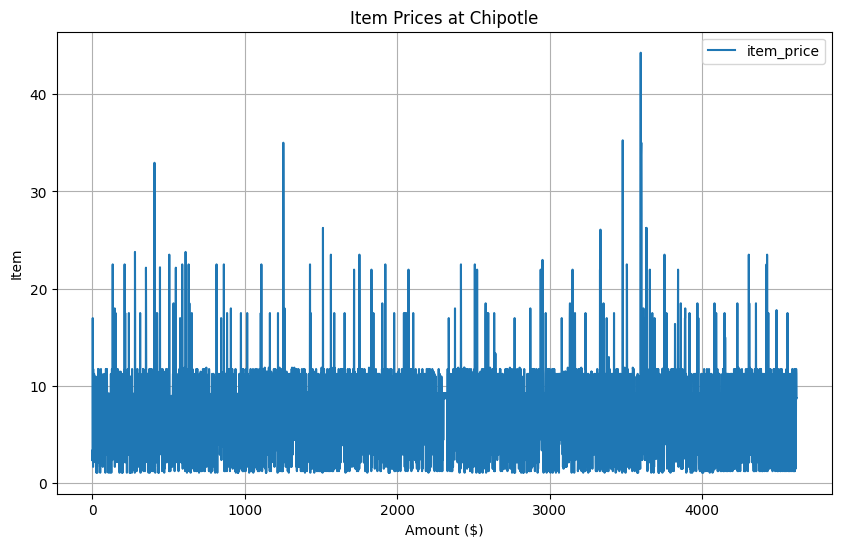

In [64]:
chipo[['item_name', 'item_price']].plot(
    figsize=(10, 6),  # Set the figure size (width, height)
    title='Item Prices at Chipotle',
    xlabel='Amount ($)',
    ylabel='Item',
    grid=True,       # Add a grid
    legend=True      # Show legend
)
plt.show()  # Display the plot

### Step 14. How much was the revenue for the period in the dataset?

### Step 15. How many orders were made in the period?

### Step 16. What is the average revenue amount per order?

In [3]:
# Solution 1



In [4]:
# Solution 2



### Step 17. How many different items are sold?